In [2]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# grhpviz
from sklearn.tree import export_graphviz

import graphviz

# 기계 학습 모델 필요 모듈
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 구성

In [3]:
df_raw = pd.read_csv("Data/diagnosis.csv", encoding="cp949")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [4]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [5]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


### 더미변수 생성

In [6]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis=1, inplace = False)

In [7]:
df_raw_dummy = pd.get_dummies(df_raw_x)
df_raw_dummy.head()
df_raw_dummy.shape

(320, 30)

### 데이터 분할

In [33]:
# train_test_split (6:4로 트레인과 테스트 데이터가 나눠진다.)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy, df_raw_y, 
                                                                test_size=0.4, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (192, 30)
train data Y size: (192,)
test data X size: (128, 30)
test data Y size: (128,)


# 2. 모델 생성

In [20]:
nn_uncustomized = KNeighborsClassifier()
nn_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))

#test데이터 정확
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


- train/test데이터가 서로 유사해보이지만 다소 과소적합상태라고 볼 수 있다.
- 아직 스케일링한 데이터를 넣지 않았기에 더 나아질 가능성이 보인다.

### 스케일링

In [30]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [36]:
### 스케일링 데이터 분할
df_scaled_train_x, df_scaled_test_x= train_test_split(df_scaled, test_size=0.4, random_state=1234)

print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))


train data X size: (192, 30)
test data X size: (128, 30)


In [37]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(df_scaled_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(knn_scaled.score(df_scaled_train_x, df_train_y)))

#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(knn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.958
Accuracy on test set: 0.922


- 스케일링한 데이터를 넣어준 것만으로 근소하지만 데이터의 성능이 올라갔다.
- 파라미터 튜닝으로 모델을 조금 더 발전시켜 보겠다.

### 하이퍼 파라미터 변경

### n_neighbors: 이웃 수 증가

In [38]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 16)] # [0.1 * c for c in range(-2, 2)]

for v_n_neighbors in para_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_neighbors
df_accuracy_neighbors["TrainScore"] = train_accuracy
df_accuracy_neighbors["TestScore"] = test_accuracy

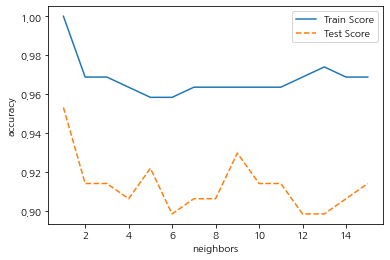

In [39]:
plt.plot(para_neighbors, train_accuracy, linestyle="-", label = "Train Score")
plt.plot(para_neighbors, test_accuracy, linestyle="--", label = "Test Score")
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.legend()

In [40]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.953
1,2,0.969,0.914
2,3,0.969,0.914
3,4,0.964,0.906
4,5,0.958,0.922
5,6,0.958,0.898
6,7,0.964,0.906
7,8,0.964,0.906
8,9,0.964,0.930
9,10,0.964,0.914


※ test데이터와 train데이터의 격차가 가장 적어보이는 N=9로 지정

### weights: 가중치별 이웃 수 증가에 따른 정확도 변화

In [41]:
para_weights = (["uniform"]*10) + (["distance"]*10)
para_weights

['uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'uniform',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance',
 'distance']

In [50]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"])*10 + (["distance"])*10

for (v_n_neighbors, v_weights) in zip(para_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

In [51]:
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.953
1,2,uniform,0.969,0.914
2,3,uniform,0.969,0.914
3,4,uniform,0.964,0.906
4,5,uniform,0.958,0.922
5,6,uniform,0.958,0.898
6,7,uniform,0.964,0.906
7,8,uniform,0.964,0.906
8,9,uniform,0.964,0.930
9,10,uniform,0.964,0.914


In [52]:
# 그림을 그리기 위해 데이터 형태 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index="Neighbors", columns="Weights",
                                                     values=["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.953125  0.953125
2                   1.0  0.968750     0.953125  0.914062
3                   1.0  0.968750     0.914062  0.914062
4                   1.0  0.963542     0.921875  0.906250
5                   1.0  0.958333     0.921875  0.921875
6                   1.0  0.958333     0.929688  0.898438
7                   1.0  0.963542     0.906250  0.906250
8                   1.0  0.963542     0.914062  0.906250
9                   1.0  0.963542     0.929688  0.929688
10                  1.0  0.963542     0.921875  0.914062

In [53]:
# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns = level0 + "_" + level1

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.953125,0.953125
2,1.0,0.968750,0.953125,0.914062
3,1.0,0.968750,0.914062,0.914062
4,1.0,0.963542,0.921875,0.906250
5,1.0,0.958333,0.921875,0.921875


In [56]:
df_accuracy_weights_pivot.head(9)

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.953125,0.953125
2,1.0,0.968750,0.953125,0.914062
3,1.0,0.968750,0.914062,0.914062
4,1.0,0.963542,0.921875,0.906250
5,1.0,0.958333,0.921875,0.921875
6,1.0,0.958333,0.929688,0.898438
7,1.0,0.963542,0.906250,0.906250
8,1.0,0.963542,0.914062,0.906250
9,1.0,0.963542,0.929688,0.929688


<AxesSubplot:xlabel='Neighbors'>

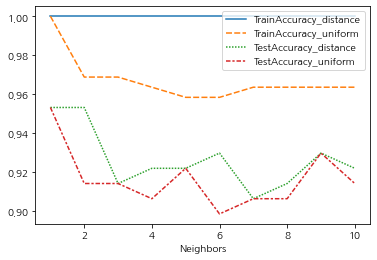

In [47]:
sns.lineplot(data=df_accuracy_weights_pivot)

- neighborhood가 9일 때는 모든 점수가 유사해 보인다.
- 트레인과 테스트의 격차가 적은 uniform방식 사용

### para_metric: 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [58]:
train_accuracy=[]; test_accuracy = []

para_neighbors = [i for i in range(1, 11)]*3 # [0.1 * c for c in range(-2, 2)]
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"] * 10
for v_n_neighbors, v_metric in zip(para_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))
    
# 결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.953
1,2,minkowski,0.969,0.914
2,3,minkowski,0.969,0.914
3,4,minkowski,0.964,0.906
4,5,minkowski,0.958,0.922
5,6,minkowski,0.958,0.898
6,7,minkowski,0.964,0.906
7,8,minkowski,0.964,0.906
8,9,minkowski,0.964,0.930
9,10,minkowski,0.964,0.914


In [59]:
# 그림을 그리기 위해 데이터 형태 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors", columns="Metric",
                                                     values=["TrainAccuracy", "TestAccuracy"])

# pivot을 이용할 경우, columns와 values가 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.953125,0.960938,0.953125
2,0.968750,0.973958,0.968750,0.914062,0.929688,0.914062
3,0.968750,0.984375,0.968750,0.914062,0.945312,0.914062
4,0.963542,0.963542,0.963542,0.906250,0.898438,0.906250
5,0.958333,0.973958,0.958333,0.921875,0.929688,0.921875


<AxesSubplot:xlabel='Neighbors'>

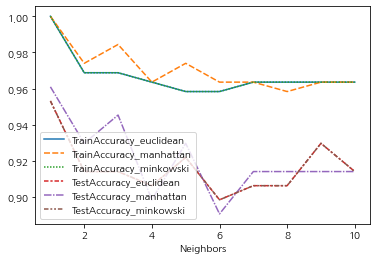

In [60]:
sns.lineplot(data=df_accuracy_metric_pivot)

- 정확도가 제일 높은 minkowski을 사용하도록 함,

## 결론 도출

In [62]:
### 최종 모델 선정

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=9, metric="minkowski", weights="uniform")
knn_model.fit(df_scaled_train_x, df_train_y)

y_pred = knn_model.predict(df_scaled_test_x)

# Train 데이터 설명력
print("Accuracy on training set: {:.3f}".format(knn_model.score(df_scaled_train_x, df_train_y)))
#test데이터 설명력
print("Accuracy on test set: {:.3f}".format(knn_model.score(df_scaled_test_x, df_test_y)))
# Confusion Matrix
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))


Accuracy on training set: 0.964
Accuracy on test set: 0.930
Comfusion Matrix: 
[[30  1]
 [ 8 89]]


초기 값(스케일링한 후)  
Accuracy on training set: 0.958  
Accuracy on test set: 0.922  

- 스케일링한 데이터보다 트레이닝 데이터보다 train과 test대이터 사이의 격차가 0.002정도 줄어들었으며, 트레이닝 데이터가 0.006상승한데 비해 테스트 데이터의 상승치가 0.008인 것으로 보아 모델이 조금 더 발전한 것으로 보인다.


- confusion matrix의 경우 실제 유방암이지만 유방암이 아니라고 판단한 경우가 1건, 유방암이 아니지만 유방암이라고 판단한 경우가 8건으로 나타났다. 특히 위의 1건의 경우 실제에서는 굉장히 위험한 모델이기 때문에 해당 값을 잡을 수 있도록 모델을 더 개선해야 할 것으로 보인다.

### 추가로 그리드 서치 가능